<a href="https://colab.research.google.com/github/alanbrazoes/notebooks/blob/main/dataframes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modulo 3 - análise de dados com python

O objetivo deste modulo é dar início ao processo de transformação e processamento de dados, para deixar no formato que precisamos antes de dar inicio as analises. Além disso, vamos filtrar, modificar e juntar diferentes tipos de dados.

## Libs

In [1]:
!pip install pandas numpy
!pip install dataline
!pip install matplotlib plotly
!pip install yfinance quandl 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 13.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-c

In [2]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as mp
import plotly.graph_objects as go

# obtenção de dados
import yfinance as yf
import quandl as qn

## 2. Criar e organizar dataframe

### 2.1. Dataframe simples, uma coluna

In [3]:
# inserindo chave
qn.ApiConfig.api_key = 'zUzeRwzzG7mj-o9WL-qE'

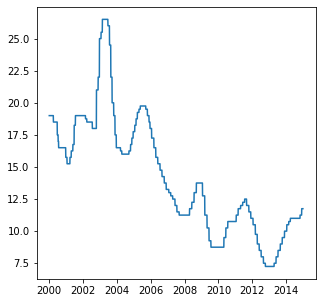

In [4]:
selic = qn.get('BCB/432', start_date = '2000-01-01', end_date = '2014-12-31')

mp.figure(figsize = (5, 5))
mp.plot(selic)
mp.show()

In [5]:
# Tabelas com uma coluna são relativamente fácelis de trabalhar. pois possui apenas um indice.
selic.head()

,Value
Date,
2000-01-01,19.0
2000-01-02,19.0
2000-01-03,19.0
2000-01-04,19.0
2000-01-05,19.0


Buscando dados de um dia específicos com métodos .loc() e .iloc()

In [6]:
# de um dia específico.
selic_dia = selic.loc['2008-12-26']
selic_dia

Value    13.75
Name: 2008-12-26 00:00:00, dtype: float64

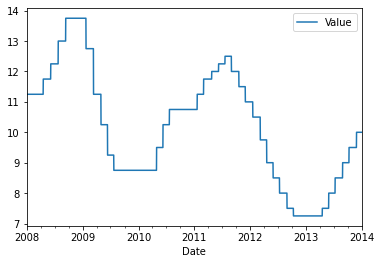

In [7]:
# De um período específico.
selic_periodo = selic.loc['2008-01-01':'2014-01-01']
selic_periodo.plot()

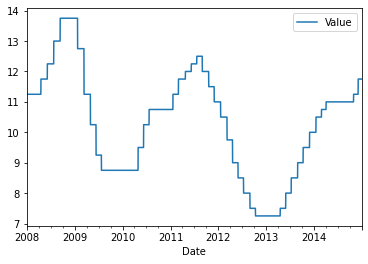

In [8]:
# De uma data de início (mesmo vale para o fim).
selic_periodo = selic.loc['2008-01-01':]
selic_periodo.plot()

Metodo .iloc()
É utilzado para recuperar dados de acordo com a posição dentro do dataframe.

In [9]:
# Primeira linha
selic_posicao = selic.iloc[0]
selic_posicao

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [10]:
# Última linha
selic_ultima_valor = selic.iloc[-1]
selic_ultima_valor

Value    11.75
Name: 2014-12-31 00:00:00, dtype: float64

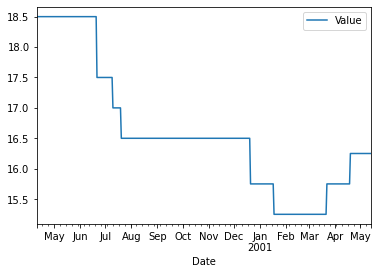

In [11]:
# Várias posicoes
selic_posicoes = selic.iloc[100:500]
selic_posicoes.plot()

### 2.2 Noções importantes de dataframes

In [12]:
tickers = ['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

In [13]:
# Ordem alfabética

tickers.sort()

In [14]:
# Adicionando .SA para funcionar no Yfinance
ativo_sa = 0
ticker_sa = []

for ticker in tickers:
  ativo_sa = (ticker + '.SA')
  ticker_sa.append(ativo_sa)

ticker_sa

['ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BIDI11.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB1

In [15]:
yf.download('VALE3.SA', start = '2022-01-01', end = '2022-01-15', p = '1d')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,79.000000,79.970001,78.000000,78.000000,75.112267,18557200
2022-01-04,78.510002,79.070000,76.900002,77.080002,74.226326,18178700
2022-01-05,77.370003,78.680000,77.129997,77.809998,74.929298,22039000
2022-01-06,78.639999,80.349998,78.309998,79.379997,76.441170,22044100
2022-01-07,80.400002,84.000000,79.790001,84.000000,80.890129,35213100
2022-01-10,82.489998,84.269997,82.300003,83.000000,79.927155,25056700
2022-01-11,83.480003,85.150002,83.309998,84.580002,81.448662,28418800
2022-01-12,86.489998,86.580002,84.930000,85.500000,82.334602,27335400
2022-01-13,84.839996,85.230003,83.699997,84.199997,81.082726,23154200


In [16]:
# Extraindo dados de toda lista tickers

yf.download(ticker_sa, start = '2022-01-01', end = '2022-01-15', p = '1d')

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- BIDI11.SA: No data found for this date range, symbol may be delisted
- GNDI3.SA: No data found, symbol may be delisted


Adj Close                                                         \
            ABEV3.SA   ALPA4.SA   AMER3.SA   ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                          
2022-01-03     15.33  34.299999  30.409204  12.617586  24.420000  10.589376   
2022-01-04     15.31  33.310001  29.370075  12.617586  24.400000  10.816573   
2022-01-05     15.01  32.029999  28.056461  11.893463  22.360001  10.589376   
2022-01-06     14.77  32.540001  28.683859  11.496684  23.049999  10.846208   
2022-01-07     14.53  32.349998  27.154577  11.268536  23.900000  11.103040   
2022-01-10     14.65  31.700001  26.605602  11.209020  23.629999  11.043771   
2022-01-11     14.68  32.580002  27.497684  11.357811  24.500000  11.073405   
2022-01-12     14.88  33.450001  28.899527  11.704993  25.610001  11.468531   
2022-01-13     14.99  33.200001  29.007360  11.923223  26.049999  11.448775   
2022-01-14     15.10  32.099998  29.713184  12.032336  26.330000  12.071098   

                                                        ...    Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...  TIMS3.SA   
Date                                                    ...             
2022-01-03  27.855999  14.937799  17.783192  19.813507  ...   5546600   
2022-01-04  27.884996  15.007597  17.899788  19.765415  ...   5998900   
2022-01-05  27.421053  14.908210  17.773222  19.524960  ...   3290600   
2022-01-06  27.643358  15.070844  18.026348  19.659616  ...   5255100   
2022-01-07  27.672354  15.134090  18.288521  19.044050  ...   5872100   
2022-01-10  27.817337  15.332868  18.351799  18.572758  ...  10245000   
2022-01-11  27.933323  15.486466  18.378923  18.591995  ...   4123400   
2022-01-12  28.203959  15.350938  18.243317  18.418867  ...   6139300   
2022-01-13  28.658237  15.522607  18.568769  18.447721  ...   3550500   
2022-01-14  29.392817  15.757524  18.867098  18.707415  ...   3124400   

                                                                       \
           TOTS3.SA  UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA   
Date                                                                    
2022-01-03  5585200   7856600  15351200  18557200   7653000  37542700   
2022-01-04  4411900   7254500  17988500  18178700   9306400  30374600   
2022-01-05  6063700  10312000  25366100  22039000   9412900  30417100   
2022-01-06  6944800   5933600  25986600  22044100   9043900  33041700   
2022-01-07  4759200   5583600  18595700  35213100   6700300  52376200   
2022-01-10  4583200   5035400  31966500  25056700   5532000  28199600   
2022-01-11  5945200   5720200  40806900  28418800   8956400  32849500   
2022-01-12  5128000   8118600  29651600  27335400  12463900  47082300   
2022-01-13  5113500   4836800  16064500  23154200  10603500  48507000   
2022-01-14  2955000   7014900  12863500  21183400   8609600  42456700   

                                        
           VIVT3.SA  WEGE3.SA YDUQ3.SA  
Date                                    
2022-01-03  1964600   5475700  3935900  
2022-01-04  1586200   4485400  2782400  
2022-01-05  2388800   8402200  3078500  
2022-01-06  1743800   6043900  3407600  
2022-01-07  1697000   6155500  3020500  
2022-01-10  1857700   7796200  2924200  
2022-01-11  2792900   7274600  2915100  
2022-01-12  1731000  10750500  2823800  
2022-01-13  1322400  12602100  3274900  
2022-01-14  1114300  12708400  2264000  

[10 rows x 552 columns]

In [17]:
cotacoes = yf.download(ticker_sa, start = '2021-01-01', end = '2021-01-15', p = '1d')

[*********************100%***********************]  92 of 92 completed

4 Failed downloads:
- IGTI11.SA: Data doesn't exist for startDate = 1609459200, endDate = 1610668800
- GNDI3.SA: No data found, symbol may be delisted
- CMIN3.SA: Data doesn't exist for startDate = 1609459200, endDate = 1610668800
- ASAI3.SA: Data doesn't exist for startDate = 1609459200, endDate = 1610668800


Obter apenas uma coluna. ex: close

In [18]:
yf.download(ticker_sa, start = '2022-01-01', end = '2022-01-15', p = '1d')['Close']

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- BIDI11.SA: No data found for this date range, symbol may be delisted
- GNDI3.SA: No data found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,15.33,34.299999,31.020000,12.72,24.420000,10.72,28.820000,15.045454,17.900000,20.600000,...,12.63,27.500000,14.12,14.970000,78.000000,20.350000,4.98,47.810001,32.020000,20.000000
2022-01-04,15.31,33.310001,29.959999,12.72,24.400000,10.95,28.850000,15.100000,18.000000,20.549999,...,12.82,26.389999,13.59,14.850000,77.080002,20.230000,4.73,47.810001,31.860001,19.670000
2022-01-05,15.01,32.029999,28.620001,11.99,22.360001,10.72,28.370001,15.000000,17.872726,20.299999,...,12.70,25.219999,13.23,13.990000,77.809998,19.340000,4.57,47.750000,30.180000,18.910000
2022-01-06,14.77,32.540001,29.260000,11.59,23.049999,10.98,28.600000,15.163636,18.127272,20.440001,...,12.61,26.000000,13.04,14.010000,79.379997,19.209999,4.36,46.980000,30.170000,18.889999
2022-01-07,14.53,32.349998,27.700001,11.36,23.900000,11.24,28.629999,15.227272,18.390909,19.799999,...,12.43,25.100000,12.95,14.680000,84.000000,19.170000,4.17,46.660000,29.410000,18.809999
2022-01-10,14.65,31.700001,27.139999,11.30,23.629999,11.18,28.780001,15.427272,18.454544,19.309999,...,12.31,24.500000,12.78,15.380000,83.000000,19.040001,4.01,46.799999,28.559999,18.059999
2022-01-11,14.68,32.580002,28.049999,11.45,24.500000,11.21,28.900000,15.581818,18.481817,19.330000,...,12.39,25.309999,12.99,16.309999,84.580002,19.420000,4.04,46.570000,29.040001,18.629999
2022-01-12,14.88,33.450001,29.480000,11.80,25.610001,11.61,29.180000,15.445454,18.345453,19.150000,...,12.49,25.309999,13.50,16.440001,85.500000,20.420000,4.11,46.689999,30.219999,18.719999
2022-01-13,14.99,33.200001,29.590000,12.02,26.049999,11.59,29.650000,15.618181,18.672728,19.180000,...,12.71,25.219999,13.38,16.370001,84.199997,20.129999,3.99,47.040001,29.100000,18.590000


In [19]:
cotacoes_ano = yf.download(ticker_sa, start = '2021-01-01', end = '2021-12-31', p = '1d')

[*********************100%***********************]  92 of 92 completed

1 Failed download:
- GNDI3.SA: No data found, symbol may be delisted


In [20]:
# Obtendo nomes das colunas
cotacoes_ano.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BBSE3.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=552)

In [21]:
# Obtendo colunas sem repetir
set(cotacoes_ano.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [22]:
# Filtar apenas coluna
open = cotacoes_ano['Open']
open

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,15.790000,42.590000,76.910004,NaN,40.000000,20.713333,39.230000,20.247932,22.752066,29.629999,...,14.78,28.910000,24.000000,14.910000,89.349998,22.299999,16.49,46.500000,37.924999,33.430000
2021-01-05,15.370000,41.709999,75.230003,NaN,37.500000,20.216665,37.450001,19.289255,21.652891,29.250000,...,14.41,27.620001,23.940001,14.970000,91.459999,21.959999,16.01,45.889999,37.325001,34.000000
2021-01-06,15.660000,41.419998,73.459999,NaN,38.049999,20.370001,37.529999,19.438017,21.727272,28.809999,...,14.10,27.670000,23.950001,15.220000,94.980003,22.120001,16.10,45.590000,39.685001,34.220001
2021-01-07,16.030001,39.509998,68.910004,NaN,37.000000,19.933332,38.119999,19.851238,22.454544,28.480000,...,13.69,26.350000,23.600000,15.910000,96.610001,21.900000,15.70,44.709999,41.189999,32.970001
2021-01-08,16.100000,38.700001,67.800003,NaN,36.549999,20.656666,39.849998,20.520660,23.190083,29.200001,...,13.53,26.440001,24.490000,16.780001,103.010002,22.219999,15.12,44.000000,42.474998,33.290001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.400000,37.869999,30.590000,14.04,26.879999,11.510000,29.299999,14.818181,17.500000,20.580000,...,12.83,29.600000,14.320000,14.900000,79.949997,21.330000,4.51,49.990002,33.889999,20.750000
2021-12-27,15.550000,36.950001,30.730000,14.09,26.120001,11.500000,29.250000,14.863636,17.618181,20.600000,...,13.00,28.719999,14.400000,14.720000,78.870003,21.230000,4.53,50.299999,33.470001,20.450001
2021-12-28,15.540000,36.709999,32.029999,13.73,25.620001,11.330000,29.340000,14.927272,17.736362,20.750000,...,12.84,28.629999,14.610000,15.010000,78.510002,21.219999,4.86,48.529999,33.209999,20.150000


In [23]:
# Obtendo coluna de um ativo
# Retorna um panda series, uma serie só e não é um dataframe
open = cotacoes_ano[('Open', 'MGLU3.SA')]
open

Date
2021-01-04    25.260000
2021-01-05    25.100000
2021-01-06    24.650000
2021-01-07    23.639999
2021-01-08    23.190001
                ...    
2021-12-23     6.220000
2021-12-27     6.230000
2021-12-28     6.790000
2021-12-29     6.840000
2021-12-30     6.800000
Name: (Open, MGLU3.SA), Length: 248, dtype: float64

In [24]:
# Transformando em um dataframe
pd.DataFrame(open)

,Open
,MGLU3.SA
Date,
2021-01-04,25.260000
2021-01-05,25.100000
2021-01-06,24.650000
2021-01-07,23.639999
2021-01-08,23.190001
...,...
2021-12-23,6.220000
2021-12-27,6.230000


### 2.3. Manejo dos NAs e NaN

In [25]:
# Verifica a quantidade de elementos nulos -> por colunas
count_null = cotacoes.isna().sum()
count_null

Adj Close  ABEV3.SA    0
           ALPA4.SA    0
           AMER3.SA    0
           ASAI3.SA    9
           AZUL4.SA    0
                      ..
Volume     VBBR3.SA    0
           VIIA3.SA    0
           VIVT3.SA    0
           WEGE3.SA    0
           YDUQ3.SA    0
Length: 552, dtype: int64

In [26]:
# -> Por linha
count_null_linha = cotacoes.isna().sum(1)
count_null_linha

Date
2021-01-04    24
2021-01-05    24
2021-01-06    24
2021-01-07    24
2021-01-08    24
2021-01-11    24
2021-01-12    24
2021-01-13    24
2021-01-14    24
dtype: int64

In [27]:
# Obter numero de colunas
print(cotacoes.shape[1])
len(cotacoes.columns)

552


552

In [28]:
# Retornar quais linha ou colunas possuem uma fração de NA
cotacoes[count_null_linha > 0].head()

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   AMER3.SA ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                         
2021-01-04  14.827890  41.191311  73.699677      NaN  37.730000  18.946781   
2021-01-05  15.143991  41.211086  72.052757      NaN  38.200001  18.984070   
2021-01-06  15.450509  38.966091  67.347267      NaN  36.669998  18.673365   
2021-01-07  15.373878  38.273796  65.984634      NaN  36.049999  19.195347   
2021-01-08  15.833660  40.251770  70.582291      NaN  36.599998  19.478090   

                                                        ...    Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  33.724125  18.463324  20.752104  27.130730  ...   3897800   
2021-01-05  33.374233  18.375044  20.625578  26.623011  ...   8506600   
2021-01-06  34.136818  18.836969  21.309168  26.189140  ...   9998400   
2021-01-07  35.491524  19.298893  21.874897  26.743017  ...  11072300   
2021-01-08  35.697868  19.150133  21.686327  27.573832  ...   5816400   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  

[5 rows x 552 columns]

In [29]:
# Filtro onde NAs representam >=5% dos dados da linha
cotacoes[(count_null_linha / len(cotacoes.columns)) > 0.04]

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   AMER3.SA ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                         
2021-01-04  14.827890  41.191311  73.699677      NaN  37.730000  18.946781   
2021-01-05  15.143991  41.211086  72.052757      NaN  38.200001  18.984070   
2021-01-06  15.450509  38.966091  67.347267      NaN  36.669998  18.673365   
2021-01-07  15.373878  38.273796  65.984634      NaN  36.049999  19.195347   
2021-01-08  15.833660  40.251770  70.582291      NaN  36.599998  19.478090   
2021-01-11  15.421773  39.371574  69.905876      NaN  36.439999  18.676474   
2021-01-12  16.092285  39.223225  72.631134      NaN  37.720001  19.217096   
2021-01-13  15.488824  39.500137  73.817314      NaN  35.959999  19.294775   
2021-01-14  15.649263  40.647362  75.826950      NaN  38.570000  19.158062   

                                                        ...    Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  33.724125  18.463324  20.752104  27.130730  ...   3897800   
2021-01-05  33.374233  18.375044  20.625578  26.623011  ...   8506600   
2021-01-06  34.136818  18.836969  21.309168  26.189140  ...   9998400   
2021-01-07  35.491524  19.298893  21.874897  26.743017  ...  11072300   
2021-01-08  35.697868  19.150133  21.686327  27.573832  ...   5816400   
2021-01-11  35.114712  18.860453  21.301311  27.001492  ...   6243300   
2021-01-12  35.437698  18.868290  21.285595  27.176888  ...   3490000   
2021-01-13  33.688236  18.515968  20.963444  27.306124  ...   9031800   
2021-01-14  33.607491  19.103163  21.607746  27.675375  ...   3154900   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
2021-01-11  7384200  4753900  38579700  29267000   7564100  36385200  3573800   
2021-01-12  5392000  5091900  21970300  28598500   5764200  39396500  2986500   
2021-01-13  3305400  6501700  31890300  31658800  11337000  40716600  2977700   
2021-01-14  2600300  6553100  20884100  20809900   6938500  41191200  2284300   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
2021-01-11  15490800  4600200  
2021-01-12  12690600  6139300  
2021-01-13  13782800  3268900  
2021-01-14   8477000  5883600  

[9 rows x 552 columns]

In [30]:
# Remove qualquer linha que seja NA em ABEV3
cotacoes.dropna(subset = [('Adj Close', 'ABEV3.SA')], inplace = True)

In [31]:
# Quais ativos possuem um NA
cotacoes.columns[count_null >= 1]

MultiIndex([('Adj Close',  'ASAI3.SA'),
            ('Adj Close',  'CMIN3.SA'),
            ('Adj Close',  'GNDI3.SA'),
            ('Adj Close', 'IGTI11.SA'),
            (    'Close',  'ASAI3.SA'),
            (    'Close',  'CMIN3.SA'),
            (    'Close',  'GNDI3.SA'),
            (    'Close', 'IGTI11.SA'),
            (     'High',  'ASAI3.SA'),
            (     'High',  'CMIN3.SA'),
            (     'High',  'GNDI3.SA'),
            (     'High', 'IGTI11.SA'),
            (      'Low',  'ASAI3.SA'),
            (      'Low',  'CMIN3.SA'),
            (      'Low',  'GNDI3.SA'),
            (      'Low', 'IGTI11.SA'),
            (     'Open',  'ASAI3.SA'),
            (     'Open',  'CMIN3.SA'),
            (     'Open',  'GNDI3.SA'),
            (     'Open', 'IGTI11.SA'),
            (   'Volume',  'ASAI3.SA'),
            (   'Volume',  'CMIN3.SA'),
            (   'Volume',  'GNDI3.SA'),
            (   'Volume', 'IGTI11.SA')],
           )

In [32]:
cotacoes_filtradas = cotacoes.drop(cotacoes.columns[count_null >= 1], axis = 1)
cotacoes_filtradas.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BBSE3.SA'),
            ('Adj Close', 'BEEF3.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=528)

In [33]:
# Novas contagens de nulos
new_count_null = cotacoes_filtradas.isna().sum()
max(new_count_null)

0

In [34]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import missingno as mi

In [36]:
cotacoes

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   AMER3.SA ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                         
2021-01-04  14.827890  41.191311  73.699677      NaN  37.730000  18.946781   
2021-01-05  15.143991  41.211086  72.052757      NaN  38.200001  18.984070   
2021-01-06  15.450509  38.966091  67.347267      NaN  36.669998  18.673365   
2021-01-07  15.373878  38.273796  65.984634      NaN  36.049999  19.195347   
2021-01-08  15.833660  40.251770  70.582291      NaN  36.599998  19.478090   
2021-01-11  15.421773  39.371574  69.905876      NaN  36.439999  18.676474   
2021-01-12  16.092285  39.223225  72.631134      NaN  37.720001  19.217096   
2021-01-13  15.488824  39.500137  73.817314      NaN  35.959999  19.294775   
2021-01-14  15.649263  40.647362  75.826950      NaN  38.570000  19.158062   

                                                        ...    Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...  TIMS3.SA   
Date                                                    ...             
2021-01-04  33.724125  18.463324  20.752104  27.130730  ...   3897800   
2021-01-05  33.374233  18.375044  20.625578  26.623011  ...   8506600   
2021-01-06  34.136818  18.836969  21.309168  26.189140  ...   9998400   
2021-01-07  35.491524  19.298893  21.874897  26.743017  ...  11072300   
2021-01-08  35.697868  19.150133  21.686327  27.573832  ...   5816400   
2021-01-11  35.114712  18.860453  21.301311  27.001492  ...   6243300   
2021-01-12  35.437698  18.868290  21.285595  27.176888  ...   3490000   
2021-01-13  33.688236  18.515968  20.963444  27.306124  ...   9031800   
2021-01-14  33.607491  19.103163  21.607746  27.675375  ...   3154900   

                                                                               \
           TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA VIVT3.SA   
Date                                                                            
2021-01-04  5429700  5472800  20687900  37865500   3953500  44372400  2791400   
2021-01-05  4430700  5428300  18302900  34300300  12993100  41436700  2899200   
2021-01-06  5512800  6564800  23592900  53722500  10884000  49797300  5790100   
2021-01-07  3322500  5638900  22298600  74541400   6954300  70842700  5213500   
2021-01-08  8427300  4449400  23237000  58562700   8434100  58505800  2916600   
2021-01-11  7384200  4753900  38579700  29267000   7564100  36385200  3573800   
2021-01-12  5392000  5091900  21970300  28598500   5764200  39396500  2986500   
2021-01-13  3305400  6501700  31890300  31658800  11337000  40716600  2977700   
2021-01-14  2600300  6553100  20884100  20809900   6938500  41191200  2284300   

                               
            WEGE3.SA YDUQ3.SA  
Date                           
2021-01-04   7219800  2640400  
2021-01-05  16633600  3703500  
2021-01-06  21507400  5004000  
2021-01-07  15129600  6138600  
2021-01-08  17381000  2685800  
2021-01-11  15490800  4600200  
2021-01-12  12690600  6139300  
2021-01-13  13782800  3268900  
2021-01-14   8477000  5883600  

[9 rows x 552 columns]

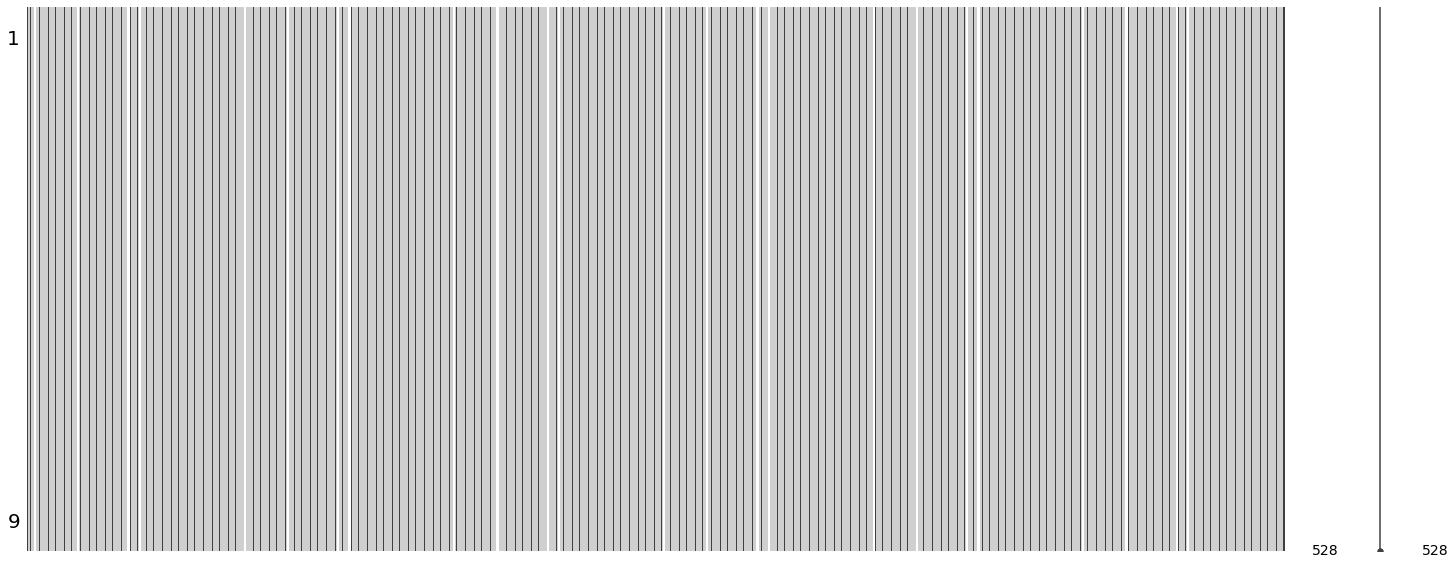

In [37]:
mi.matrix(cotacoes)

Mostra o número de linhas completas - comentei pois é muito grande
mi.bar(cotacoes)

#### Preenchendo dados vazios

In [38]:
bovespa = pd.read_csv('Bovespa.csv')

In [39]:
acao = 'CYRE3'

In [40]:
# fazendo python entender a data
bovespa.index = pd.to_datetime(bovespa.Date)

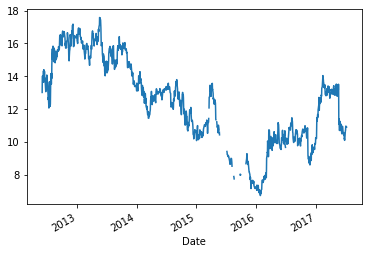

In [41]:
cyre = bovespa[acao]
cyre.plot()

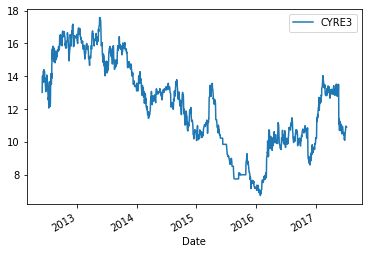

In [42]:
cy = pd.DataFrame(cyre)
cy.fillna(method='ffill').plot()

### 2.4. Formatação de dados

#### Redução do número de colunas - wide to long

In [43]:
ativos = cotacoes_filtradas

#### Método melt

Pega uma tabela larga e transforma em uma tabela curta com mais linhas

O que era colunas viram categorias em colunas novas, as variáveis, e os valores são todos mostrados na colunavalor, ou value.

In [44]:
cotacoes_long = pd.melt(ativos, ignore_index=False)
cotacoes_long

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-01-08,Volume,YDUQ3.SA,2.685800e+06
2021-01-11,Volume,YDUQ3.SA,4.600200e+06
2021-01-12,Volume,YDUQ3.SA,6.139300e+06


In [45]:
# Exibindo nome das colunas
cotacoes_long.columns

Index(['variable_0', 'variable_1', 'value'], dtype='object')

#### Renomeando colunas

In [46]:
cotacoes_long = cotacoes_long.rename({'variable_0':'Parametro',
                                      'variable_1':'Ativo', 'value':'Valor'}, 
                                     axis = 1)
cotacoes_long.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.827890
2021-01-05,Adj Close,ABEV3.SA,15.143991
2021-01-06,Adj Close,ABEV3.SA,15.450509
2021-01-07,Adj Close,ABEV3.SA,15.373878
2021-01-08,Adj Close,ABEV3.SA,15.833660


In [47]:
# Todas as categorias presentes em 'Prametro'
set(cotacoes_long['Ativo'])

{'ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BIDI11.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SOMA3.SA',
 'SULA11.SA',
 'SUZB

#### Filtros e substituições

In [48]:
df_cotacoes = cotacoes_long.copy()
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-01-08,Volume,YDUQ3.SA,2.685800e+06
2021-01-11,Volume,YDUQ3.SA,4.600200e+06
2021-01-12,Volume,YDUQ3.SA,6.139300e+06


In [49]:
# Pegar da coluna parametro apenas as categorias Close.
df_cotacoes_close = df_cotacoes[df_cotacoes.Parametro == 'Close']
df_cotacoes_close

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Close,ABEV3.SA,15.480000
2021-01-05,Close,ABEV3.SA,15.810000
2021-01-06,Close,ABEV3.SA,16.129999
2021-01-07,Close,ABEV3.SA,16.049999
2021-01-08,Close,ABEV3.SA,16.530001
...,...,...,...
2021-01-08,Close,YDUQ3.SA,34.349998
2021-01-11,Close,YDUQ3.SA,32.590000
2021-01-12,Close,YDUQ3.SA,34.099998


In [50]:
# Filtros com múltiplas condições.

# Selceionas as linhas que tem o valor menor que 10
df_cotacoes_Close_low_cost = df_cotacoes[
                                         (df_cotacoes.Parametro == 'Close') & 
                                         (df_cotacoes.Valor < 10)]
df_cotacoes_Close_low_cost

,Parametro,Ativo,Valor
Date,,,
2021-01-05,Close,BEEF3.SA,9.84
2021-01-06,Close,BEEF3.SA,9.70
2021-01-07,Close,BEEF3.SA,9.65
2021-01-08,Close,BEEF3.SA,9.73
2021-01-11,Close,BEEF3.SA,9.61
...,...,...,...
2021-01-08,Close,POSI3.SA,4.80
2021-01-11,Close,POSI3.SA,4.81
2021-01-12,Close,POSI3.SA,4.87


In [51]:
# Selecionando apenas as linhas que possuem dados de Volume
df_cotacoes_Volume = df_cotacoes[df_cotacoes.Parametro == 'Volume']
df_cotacoes_Volume

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.0
2021-01-05,Volume,ABEV3.SA,37105800.0
2021-01-06,Volume,ABEV3.SA,28371600.0
2021-01-07,Volume,ABEV3.SA,32540100.0
2021-01-08,Volume,ABEV3.SA,30188800.0
...,...,...,...
2021-01-08,Volume,YDUQ3.SA,2685800.0
2021-01-11,Volume,YDUQ3.SA,4600200.0
2021-01-12,Volume,YDUQ3.SA,6139300.0


In [52]:
# Mediana por volume
volume_mediano = np.median(df_cotacoes_Volume.Valor)
volume_mediano

6987450.0

In [53]:
# Todos os ativos com volume mair que a mediana
df_cotacoes[(df_cotacoes.Valor > volume_mediano)]

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.0
2021-01-05,Volume,ABEV3.SA,37105800.0
2021-01-06,Volume,ABEV3.SA,28371600.0
2021-01-07,Volume,ABEV3.SA,32540100.0
2021-01-08,Volume,ABEV3.SA,30188800.0
...,...,...,...
2021-01-08,Volume,WEGE3.SA,17381000.0
2021-01-11,Volume,WEGE3.SA,15490800.0
2021-01-12,Volume,WEGE3.SA,12690600.0


In [54]:
# Filtro onde a coluna Parametro precisa ser "Adj Close" e o valor precisa ser menor que 10 OU maior que 80
df_cotacoes[(df_cotacoes.Parametro == 'Close') & ((df_cotacoes.Valor < 10) | (df_cotacoes.Valor > 80))]

,Parametro,Ativo,Valor
Date,,,
2021-01-05,Close,BEEF3.SA,9.840000
2021-01-06,Close,BEEF3.SA,9.700000
2021-01-07,Close,BEEF3.SA,9.650000
2021-01-08,Close,BEEF3.SA,9.730000
2021-01-11,Close,BEEF3.SA,9.610000
...,...,...,...
2021-01-08,Close,VALE3.SA,102.000000
2021-01-11,Close,VALE3.SA,101.980003
2021-01-12,Close,VALE3.SA,99.190002


In [55]:
# Selecionar ativo com base em listas

ativos_lista = ['VALE3.SA', 'WEGE3.SA']
df_cotacoes_lista = df_cotacoes[df_cotacoes.Ativo.isin(ativos_lista)]
df_cotacoes_lista

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,VALE3.SA,7.486809e+01
2021-01-05,Adj Close,VALE3.SA,7.612872e+01
2021-01-06,Adj Close,VALE3.SA,7.862542e+01
2021-01-07,Adj Close,VALE3.SA,8.375797e+01
2021-01-08,Adj Close,VALE3.SA,8.349602e+01
...,...,...,...
2021-01-08,Volume,WEGE3.SA,1.738100e+07
2021-01-11,Volume,WEGE3.SA,1.549080e+07
2021-01-12,Volume,WEGE3.SA,1.269060e+07


In [56]:
# Selecionando aticos que não estão na lista
ativos_lista = ['VALE3.SA', 'WEGE3.SA',]
df_cotacoes_nao_listados = df_cotacoes[~df_cotacoes.Ativo.isin(ativos_lista)]
df_cotacoes_nao_listados

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-01-08,Volume,YDUQ3.SA,2.685800e+06
2021-01-11,Volume,YDUQ3.SA,4.600200e+06
2021-01-12,Volume,YDUQ3.SA,6.139300e+06


In [57]:
# Utilizando o operador "date_range" para retornar todas as datas que estão presentes em um intervalo

data_range_IBOV = pd.date_range(start='2021-01-02',end='2021-01-20')
data_range_IBOV

DatetimeIndex(['2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
               '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09',
               '2021-01-10', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15', '2021-01-16', '2021-01-17',
               '2021-01-18', '2021-01-19', '2021-01-20'],
              dtype='datetime64[ns]', freq='D')

In [58]:
# Selecionar as linhas do nosso data frame de ativos que contém apenas o intervalo de datas determinado acima

df_cotacoes_index_range = df_cotacoes[df_cotacoes.index.isin(data_range_IBOV)]
df_cotacoes_index_range

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-01-08,Volume,YDUQ3.SA,2.685800e+06
2021-01-11,Volume,YDUQ3.SA,4.600200e+06
2021-01-12,Volume,YDUQ3.SA,6.139300e+06


#### Duplicatas

In [59]:
tick = df_cotacoes[df_cotacoes.Ativo.str[-4]=='3']
tick.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.827890
2021-01-05,Adj Close,ABEV3.SA,15.143991
2021-01-06,Adj Close,ABEV3.SA,15.450509
2021-01-07,Adj Close,ABEV3.SA,15.373878
2021-01-08,Adj Close,ABEV3.SA,15.833660


In [60]:
set(tick['Ativo'])

{'ABEV3.SA',
 'AMER3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BRFS3.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SBSP3.SA',
 'SOMA3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'VALE3.SA',
 'VBBR3.SA',
 'VIIA3.SA',
 'VIVT3.SA',
 'WEGE3.SA',
 'YDUQ3.SA'}

In [61]:
# Verificação de duplicatas
tick.duplicated().any()

True

In [62]:
print(
    tick['Parametro'].duplicated().any(),
    tick['Ativo'].duplicated().any(),
    tick['Valor'].duplicated().any()
)

True True True


In [63]:
tick[tick.duplicated(keep=False)]

,Parametro,Ativo,Valor
Date,,,
2021-01-07,Adj Close,BRML3.SA,9.088367
2021-01-11,Adj Close,BRML3.SA,9.088367
2021-01-08,Adj Close,CCRO3.SA,12.792543
2021-01-13,Adj Close,CCRO3.SA,12.792543
2021-01-06,Adj Close,CIEL3.SA,3.444748
...,...,...,...
2021-01-12,Open,SBSP3.SA,41.750000
2021-01-13,Open,SBSP3.SA,41.750000
2021-01-14,Open,SBSP3.SA,42.470001


In [64]:
tick.shape

(3510, 3)

In [65]:
# Caso quiséssemos remover as duplicatas

sem_duplicatas = tick.drop_duplicates(subset=['Parametro', 'Ativo','Valor'], keep=False)
sem_duplicatas.shape

(3357, 3)

### Drop
 
Quando precisamos remover linhas e colunas.

In [66]:
sem_duplicatas.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-04',
               ...
               '2021-01-14', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14'],
              dtype='datetime64[ns]', name='Date', length=3357, freq=None)

In [67]:
# Suponha que você quer remover duas datas:

a = pd.to_datetime('2021-01-04')
b = pd.to_datetime('2021-01-05')
c = pd.to_datetime('2021-01-06')

In [68]:
sem_duplicatas.drop([a,b,c])

,Parametro,Ativo,Valor
Date,,,
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
2021-01-11,Adj Close,ABEV3.SA,1.542177e+01
2021-01-12,Adj Close,ABEV3.SA,1.609229e+01
2021-01-13,Adj Close,ABEV3.SA,1.548882e+01
...,...,...,...
2021-01-08,Volume,YDUQ3.SA,2.685800e+06
2021-01-11,Volume,YDUQ3.SA,4.600200e+06
2021-01-12,Volume,YDUQ3.SA,6.139300e+06


In [69]:
sem_duplicatas.drop(['Valor'], axis = 1)

,Parametro,Ativo
Date,,
2021-01-04,Adj Close,ABEV3.SA
2021-01-05,Adj Close,ABEV3.SA
2021-01-06,Adj Close,ABEV3.SA
2021-01-07,Adj Close,ABEV3.SA
2021-01-08,Adj Close,ABEV3.SA
...,...,...
2021-01-08,Volume,YDUQ3.SA
2021-01-11,Volume,YDUQ3.SA
2021-01-12,Volume,YDUQ3.SA


In [70]:
# Podemos remover pelo índice
# Caso queira que as mudanças permaneçam, utilizar 'inplace'
sem_duplicatas.drop(sem_duplicatas.columns[[0,1]], axis = 1)

,Valor
Date,
2021-01-04,1.482789e+01
2021-01-05,1.514399e+01
2021-01-06,1.545051e+01
2021-01-07,1.537388e+01
2021-01-08,1.583366e+01
...,...
2021-01-08,2.685800e+06
2021-01-11,4.600200e+06
2021-01-12,6.139300e+06


### Exercício

In [71]:
abev = df_cotacoes[(df_cotacoes.Ativo == 'ABEV3.SA') & (df_cotacoes.Parametro == 'Adj Close')]
abev

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.827890
2021-01-05,Adj Close,ABEV3.SA,15.143991
2021-01-06,Adj Close,ABEV3.SA,15.450509
2021-01-07,Adj Close,ABEV3.SA,15.373878
2021-01-08,Adj Close,ABEV3.SA,15.833660
2021-01-11,Adj Close,ABEV3.SA,15.421773
2021-01-12,Adj Close,ABEV3.SA,16.092285
2021-01-13,Adj Close,ABEV3.SA,15.488824
2021-01-14,Adj Close,ABEV3.SA,15.649263


In [72]:
a = pd.to_datetime('2021-01-04')
b = pd.to_datetime('2021-01-05')
c = pd.to_datetime('2021-01-06')

abev.drop([a,b,c])

,Parametro,Ativo,Valor
Date,,,
2021-01-07,Adj Close,ABEV3.SA,15.373878
2021-01-08,Adj Close,ABEV3.SA,15.833660
2021-01-11,Adj Close,ABEV3.SA,15.421773
2021-01-12,Adj Close,ABEV3.SA,16.092285
2021-01-13,Adj Close,ABEV3.SA,15.488824
2021-01-14,Adj Close,ABEV3.SA,15.649263


## 3 - Consolidação de dataframes

Como fazer dataframes a partir de outros pre-existentes. Facilitando a retenção de dados importantes.

### 3.1. Count
Contas as células que não possuem NAs para cada linha ou coluna.

In [73]:
tick.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.827890
2021-01-05,Adj Close,ABEV3.SA,15.143991
2021-01-06,Adj Close,ABEV3.SA,15.450509
2021-01-07,Adj Close,ABEV3.SA,15.373878
2021-01-08,Adj Close,ABEV3.SA,15.833660


In [74]:
tick.count()

Parametro    3510
Ativo        3510
Valor        3510
dtype: int64

In [75]:
tick.count(axis=1)

Date
2021-01-04    3
2021-01-05    3
2021-01-06    3
2021-01-07    3
2021-01-08    3
             ..
2021-01-08    3
2021-01-11    3
2021-01-12    3
2021-01-13    3
2021-01-14    3
Length: 3510, dtype: int64

### Concatenar outros DFs e organizar colunas

In [76]:
shares = tick.copy()
shares.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.827890
2021-01-05,Adj Close,ABEV3.SA,15.143991
2021-01-06,Adj Close,ABEV3.SA,15.450509
2021-01-07,Adj Close,ABEV3.SA,15.373878
2021-01-08,Adj Close,ABEV3.SA,15.833660


In [77]:
tickers_futuros = ['^BVSP']

In [78]:
dia_semana = pd.to_datetime(shares.index).strftime('%A')
dia_semana

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Monday',
       ...
       'Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='Date', length=3510)

In [79]:
# Inserir o dia da semana como nova coluna
shares.insert(0, 'Dia_semana', dia_semana)
shares.head()

,Dia_semana,Parametro,Ativo,Valor
Date,,,,
2021-01-04,Monday,Adj Close,ABEV3.SA,14.827890
2021-01-05,Tuesday,Adj Close,ABEV3.SA,15.143991
2021-01-06,Wednesday,Adj Close,ABEV3.SA,15.450509
2021-01-07,Thursday,Adj Close,ABEV3.SA,15.373878
2021-01-08,Friday,Adj Close,ABEV3.SA,15.833660


In [80]:
# Ajustando a formatação do mês e transformando em um novo DF
mes = pd.DataFrame(pd.to_datetime(shares.index).strftime('%B'))

In [81]:
# Nome da coluna
mes = mes.rename({'Date':'Mes'}, axis = 1)

In [82]:
# Ajustando o indice para que seja o mesmo de shares. O indice passará a ser a data.
mes.index = shares.index
mes

,Mes
Date,
2021-01-04,January
2021-01-05,January
2021-01-06,January
2021-01-07,January
2021-01-08,January
...,...
2021-01-08,January
2021-01-11,January
2021-01-12,January


In [83]:
# Ajustando a formatação do ano e transformando num novo DF
ano = pd.DataFrame(pd.to_datetime(shares.index).strftime('%Y'))

# Mudando nome da coluna
ano = ano.rename({'Date':'Ano'}, axis = 1)

# Ajustando o indice para que seja o mesmo de shares. O indice passará a ser a data.
ano.index = shares.index
ano

,Ano
Date,
2021-01-04,2021
2021-01-05,2021
2021-01-06,2021
2021-01-07,2021
2021-01-08,2021
...,...
2021-01-08,2021
2021-01-11,2021
2021-01-12,2021


In [84]:
# Juntando colunas mes e ano
ibov_data = pd.concat([mes,ano], axis=1)
ibov_data.head()

,Mes,Ano
Date,,
2021-01-04,January,2021
2021-01-05,January,2021
2021-01-06,January,2021
2021-01-07,January,2021
2021-01-08,January,2021


In [85]:
share_date = pd.concat([shares, ibov_data], axis = 1)
share_date.head()

,Dia_semana,Parametro,Ativo,Valor,Mes,Ano
Date,,,,,,
2021-01-04,Monday,Adj Close,ABEV3.SA,14.827890,January,2021
2021-01-05,Tuesday,Adj Close,ABEV3.SA,15.143991,January,2021
2021-01-06,Wednesday,Adj Close,ABEV3.SA,15.450509,January,2021
2021-01-07,Thursday,Adj Close,ABEV3.SA,15.373878,January,2021
2021-01-08,Friday,Adj Close,ABEV3.SA,15.833660,January,2021


In [86]:
# Mudando ordem dasa colunas

novas_ordens = ['Ano', 'Mes', 'Dia_semana', 'Parametro', 'Ativo', 'Valor']
share_date = share_date[novas_ordens]
share_date.head()

,Ano,Mes,Dia_semana,Parametro,Ativo,Valor
Date,,,,,,
2021-01-04,2021,January,Monday,Adj Close,ABEV3.SA,14.827890
2021-01-05,2021,January,Tuesday,Adj Close,ABEV3.SA,15.143991
2021-01-06,2021,January,Wednesday,Adj Close,ABEV3.SA,15.450509
2021-01-07,2021,January,Thursday,Adj Close,ABEV3.SA,15.373878
2021-01-08,2021,January,Friday,Adj Close,ABEV3.SA,15.833660


In [87]:
set(share_date.Parametro)

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

### Reconstrução de DFs

In [88]:
open = share_date[share_date.Parametro == 'Open']
high = share_date[share_date.Parametro == 'High']
low = share_date[share_date.Parametro == 'Low']
close = share_date[share_date.Parametro == 'Close']
adj = share_date[share_date.Parametro == 'Adj Close']
volume = share_date[share_date.Parametro == 'Volume']

In [89]:
high.head()

,Ano,Mes,Dia_semana,Parametro,Ativo,Valor
Date,,,,,,
2021-01-04,2021,January,Monday,High,ABEV3.SA,15.85
2021-01-05,2021,January,Tuesday,High,ABEV3.SA,16.02
2021-01-06,2021,January,Wednesday,High,ABEV3.SA,16.23
2021-01-07,2021,January,Thursday,High,ABEV3.SA,16.24
2021-01-08,2021,January,Friday,High,ABEV3.SA,16.75


In [90]:
open.rename(columns={'Valor':'Open'}, inplace = True)
high.rename(columns={'Valor':'High'}, inplace = True)
low.rename(columns={'Valor':'Low'}, inplace = True)
close.rename(columns={'Valor':'Close'}, inplace = True)
adj.rename(columns={'Valor':'Adj Close'}, inplace = True)
volume.rename(columns={'Valor':'Volume'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
high.drop(high.columns[0:5], axis = 1, inplace = True)
low.drop(low.columns[0:5], axis = 1, inplace = True)
adj.drop(adj.columns[0:5], axis = 1, inplace = True)
close.drop(close.columns[0:5], axis = 1, inplace = True)
volume.drop(volume.columns[0:5], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
high.head()

,High
Date,
2021-01-04,15.85
2021-01-05,16.02
2021-01-06,16.23
2021-01-07,16.24
2021-01-08,16.75


In [93]:
ohlc = pd.concat([open,high,low,close,adj,volume], axis = 1)
ohlc.drop(['Parametro'], inplace = True, axis = 1)
ohlc

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3.SA,15.790000,15.850000,15.380000,15.480000,14.827890,17835200.0
2021-01-05,2021,January,Tuesday,ABEV3.SA,15.370000,16.020000,15.230000,15.810000,15.143991,37105800.0
2021-01-06,2021,January,Wednesday,ABEV3.SA,15.660000,16.230000,15.630000,16.129999,15.450509,28371600.0
2021-01-07,2021,January,Thursday,ABEV3.SA,16.030001,16.240000,15.910000,16.049999,15.373878,32540100.0
2021-01-08,2021,January,Friday,ABEV3.SA,16.100000,16.750000,16.030001,16.530001,15.833660,30188800.0
...,...,...,...,...,...,...,...,...,...,...
2021-01-08,2021,January,Friday,YDUQ3.SA,33.290001,34.500000,33.000000,34.349998,33.556667,2685800.0
2021-01-11,2021,January,Monday,YDUQ3.SA,34.669998,34.680000,32.330002,32.590000,31.837317,4600200.0
2021-01-12,2021,January,Tuesday,YDUQ3.SA,32.119999,34.180000,31.740000,34.099998,33.312443,6139300.0


### Binning

Criar variáveis qualitativas que representam as categorias de uma variável numérica anterior.

In [94]:
ohlc.head()

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3.SA,15.790000,15.85,15.380000,15.480000,14.827890,17835200.0
2021-01-05,2021,January,Tuesday,ABEV3.SA,15.370000,16.02,15.230000,15.810000,15.143991,37105800.0
2021-01-06,2021,January,Wednesday,ABEV3.SA,15.660000,16.23,15.630000,16.129999,15.450509,28371600.0
2021-01-07,2021,January,Thursday,ABEV3.SA,16.030001,16.24,15.910000,16.049999,15.373878,32540100.0
2021-01-08,2021,January,Friday,ABEV3.SA,16.100000,16.75,16.030001,16.530001,15.833660,30188800.0


In [95]:
# Resultado nominal
ohlc['Resultado'] = (ohlc['Close'] - ohlc['Open']) / ohlc['Close']
ohlc.head()

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado
Date,,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3.SA,15.790000,15.85,15.380000,15.480000,14.827890,17835200.0,-0.020026
2021-01-05,2021,January,Tuesday,ABEV3.SA,15.370000,16.02,15.230000,15.810000,15.143991,37105800.0,0.027831
2021-01-06,2021,January,Wednesday,ABEV3.SA,15.660000,16.23,15.630000,16.129999,15.450509,28371600.0,0.029138
2021-01-07,2021,January,Thursday,ABEV3.SA,16.030001,16.24,15.910000,16.049999,15.373878,32540100.0,0.001246
2021-01-08,2021,January,Friday,ABEV3.SA,16.100000,16.75,16.030001,16.530001,15.833660,30188800.0,0.026013


In [96]:
resultado_oc = ohlc['Close'] - ohlc['Open']
resultado_bin = []

for resultado in resultado_oc:
  if resultado > 0:
    resultado_bin.append('Positivo')
  else:
    resultado_bin.append('Negativo')

In [97]:
ohlc['Resultado_bin'] = resultado_bin
ohlc.head()

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado,Resultado_bin
Date,,,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3.SA,15.790000,15.85,15.380000,15.480000,14.827890,17835200.0,-0.020026,Negativo
2021-01-05,2021,January,Tuesday,ABEV3.SA,15.370000,16.02,15.230000,15.810000,15.143991,37105800.0,0.027831,Positivo
2021-01-06,2021,January,Wednesday,ABEV3.SA,15.660000,16.23,15.630000,16.129999,15.450509,28371600.0,0.029138,Positivo
2021-01-07,2021,January,Thursday,ABEV3.SA,16.030001,16.24,15.910000,16.049999,15.373878,32540100.0,0.001246,Positivo
2021-01-08,2021,January,Friday,ABEV3.SA,16.100000,16.75,16.030001,16.530001,15.833660,30188800.0,0.026013,Positivo


### CrossTab

Formação de uma nova tabela cruzada de frequencia com base em informações solicitadas.

In [98]:
cross_meses = pd.crosstab(ohlc['Mes'], ohlc['Resultado_bin'])
cross_meses.head()

Resultado_bin,Negativo,Positivo
Mes,,
January,323,262


In [99]:
cross_meses['Total']=cross_meses.Negativo+cross_meses.Positivo
cross_meses['Neg_%']=cross_meses.Negativo/cross_meses.Total*100
cross_meses['Pos_%']=cross_meses.Positivo/cross_meses.Total*100

### Pivot table
Agrupa itens individuais de uma tabela maior em uma ou mais caracteristicas da tabela.

In [100]:
## Pivot table

pivot_table_meses = pd.pivot_table(ohlc, values = 'Resultado', 
                                   index = ['Mes'], columns = [], aggfunc = np.mean)
pivot_table_meses.sort_values('Resultado', ascending = True)

,Resultado
Mes,
January,0.000257
